# Plotting Enrollment Simulation Data

This notebook visualizes the enrollment statistic data generated in `enrollment_simulations.ipynb`.

In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Enrollment Simulation 1 of 3: Overall Effects of Polyculture vs Monoculture

For accompanying discussion, see *Effects on Average Enrolled Student Quality* in Section 5.2.2 of the Arxiv manuscript.

## Loading Data

This cell automatically loads the pre-generated enrollment simulation data. If you have generated new data from scratch, replace `run_location` with the filepath to your newly genreated data.

In [2]:
run_location = "saved_runs/avg_effects/20251217_190807_run"

with open(f'{run_location}/params.pkl', 'rb') as f:
    avg_qual_params_dict = pickle.load(f)

with open(f'{run_location}/stats.pkl', 'rb') as f:
    avg_qual_stats = np.array(pickle.load(f))

avg_qual_means = np.nanmean(avg_qual_stats, axis = 2)

non_nan = np.count_nonzero(~np.isnan(avg_qual_stats), axis=2)
avg_qual_std_err = np.nanstd(avg_qual_stats, axis=2)/np.sqrt(non_nan)

## Plot 1 of 2: Average Quality of Enrolled Classes in Monoculture and Polyculture

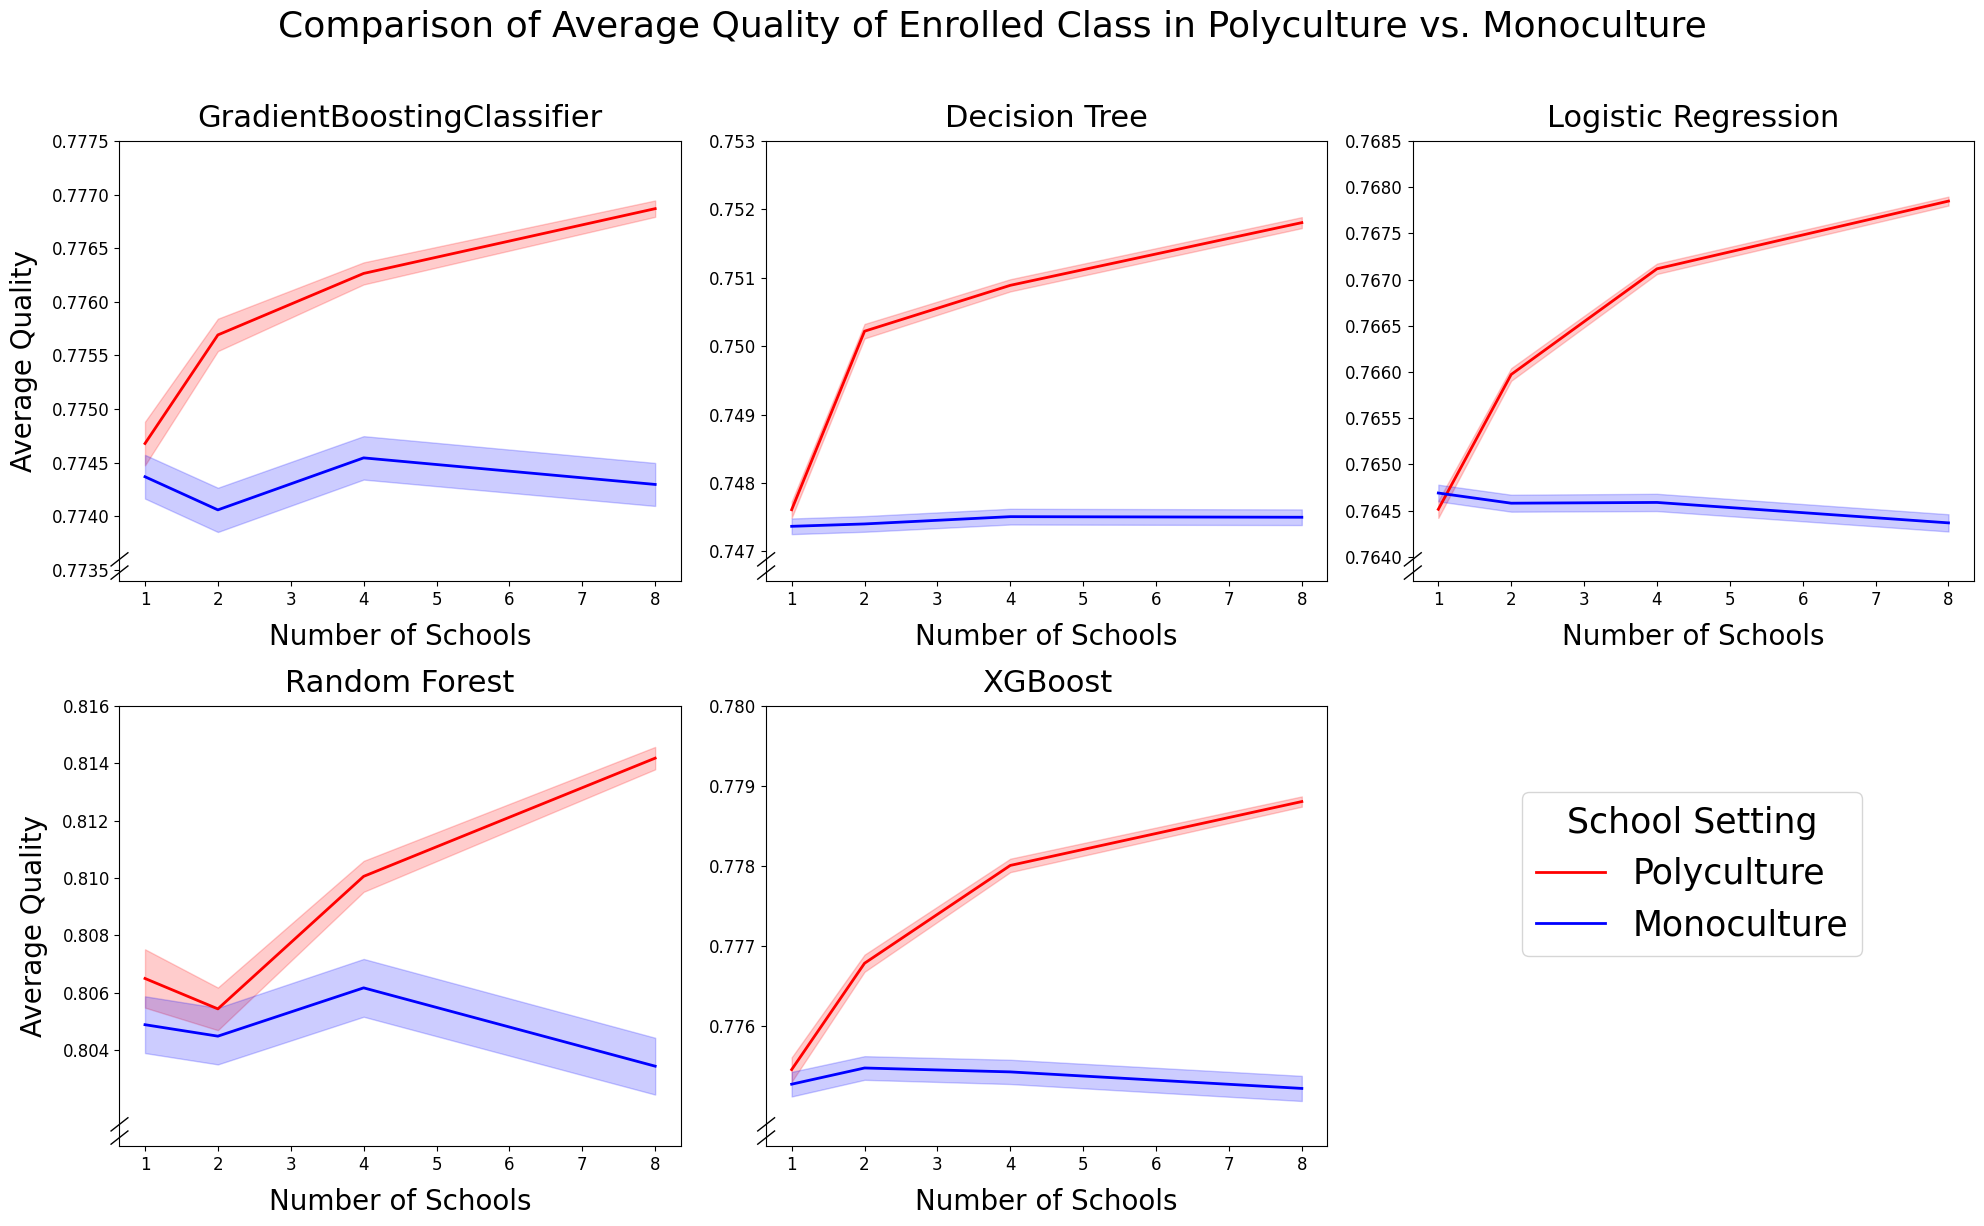

In [10]:
model_types = avg_qual_params_dict['model_types']
schools = avg_qual_params_dict['schools']

# Set global font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

model_titles = {
    'gb': 'GradientBoostingClassifier',
    'xgb': 'XGBoost',
    'log': 'Logistic Regression',
    'tree': 'Decision Tree',
    'rf': 'Random Forest'
}

d = 0.015 

for i, model in enumerate(model_types):
    # polyculture
    axes[i].plot(schools, avg_qual_means[i][:, 0],
                color='red', label='Polyculture', linewidth=2) 
    axes[i].fill_between(schools,
                        avg_qual_means[i][:, 0] - avg_qual_std_err[i][:, 0],
                        avg_qual_means[i][:, 0] + avg_qual_std_err[i][:, 0],
                        color='red', alpha=0.2)
    
    # monoculture
    axes[i].plot(schools,avg_qual_means[i][:, 1],
                color='blue', label='Monoculture', linewidth=2)
    axes[i].fill_between(schools,
                        avg_qual_means[i][:, 1] - avg_qual_std_err[i][:, 1],
                        avg_qual_means[i][:, 1] + avg_qual_std_err[i][:, 1],
                        color='blue', alpha=0.2)
    
    axes[i].set_title(model_titles[model], fontsize=22, pad=10)
    axes[i].set_xlabel('Number of Schools', fontsize=20, labelpad=10)
    if i % 3 == 0: 
        axes[i].set_ylabel('Average Quality', fontsize=20, labelpad=10)
    
    axes[i].tick_params(axis='both', which='major', labelsize=12)

    ymin, ymax = axes[i].get_ylim()

    new_ymin = ymin - 0.09*(ymax - ymin)
    axes[i].set_ylim(new_ymin, ymax)

    ticks = axes[i].get_yticks()
    if i <= 2:
        axes[i].set_yticks(ticks[1:])
    else:
        axes[i].set_yticks(ticks[2:])

    # Add Tressman's marks (axis break marks) to the bottom of the y-axis.
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False, linewidth=1)

    # Left-side mark near (0, 0) in axes coordinates.
    axes[i].plot((-d, +d), (0.02-d, 0.02+d), **kwargs)
    # Right-side mark near (1, 0) in axes coordinates.
    axes[i].plot((-d, +d), (0.05-d, 0.05+d), **kwargs)

axes[-1].remove()

legend_elements = [
    Line2D([0], [0], color='red', label='Polyculture', linewidth=2),
    Line2D([0], [0], color='blue', label='Monoculture', linewidth=2)
]

fig.legend(handles=legend_elements,
          bbox_to_anchor=(0.85, 0.3),
          title='School Setting',
          loc='center',
          fontsize=25,
          title_fontsize=25)

plt.suptitle('Comparison of Average Quality of Enrolled Class in Polyculture vs. Monoculture',
            y=1.02, fontsize=26)

plt.tight_layout()


if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig('plots/avg_qual_ELS.pdf',
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=300)

plt.show()

## Plot 2 of 2: Average Quality of Differential Students in Monoculture and Polyculture

Rather than comparing the average quality of the total average class, the red line plots the average quality of the subset of students enrolled under polyculture, but not under monoculture, while the blue line plots the average quality of students enrolled in a monoculture setting, but not polyculture. 

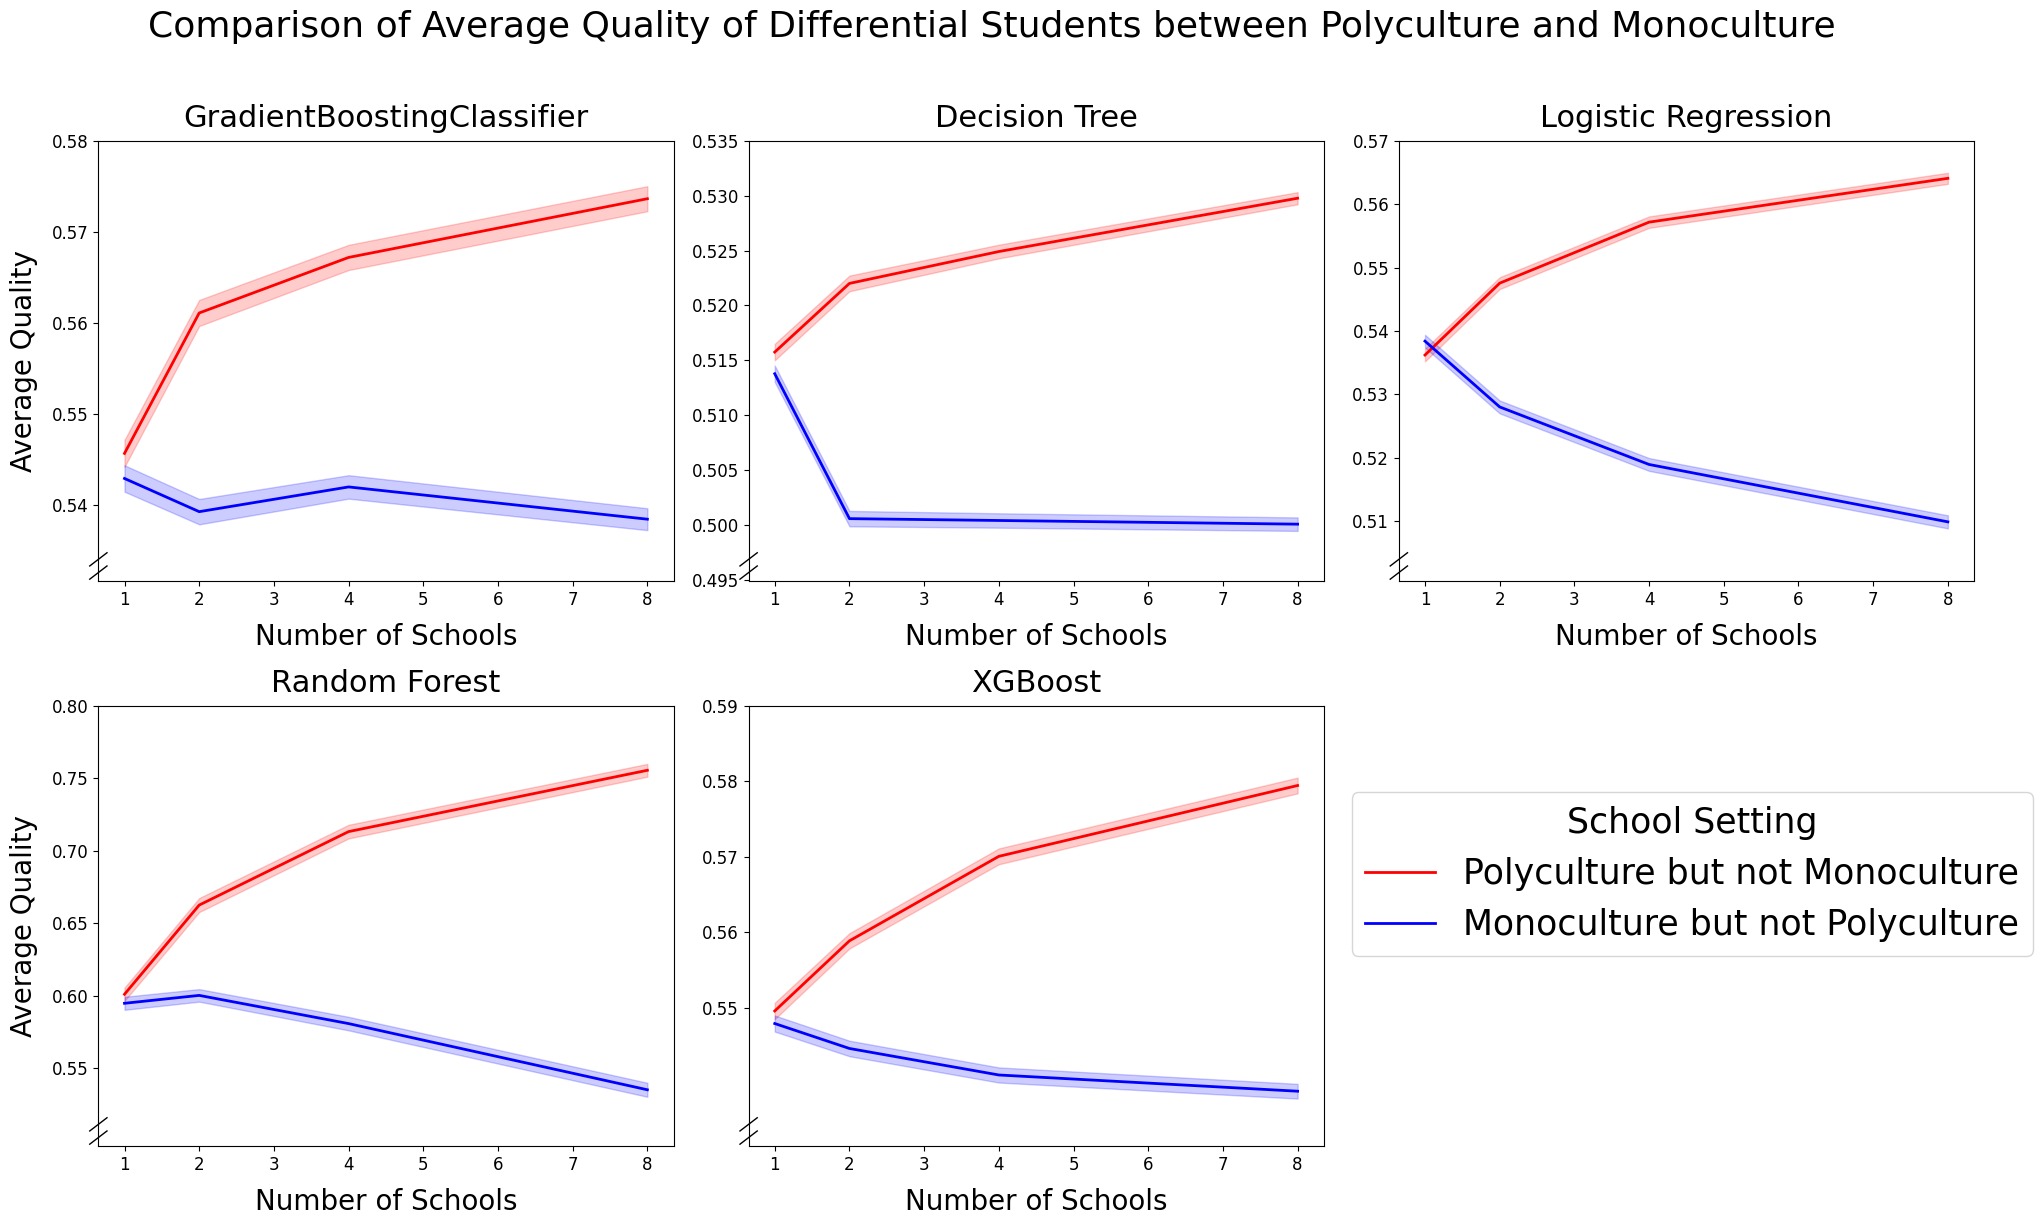

In [11]:
model_types = avg_qual_params_dict['model_types']
schools = avg_qual_params_dict['schools']

plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

model_titles = {
    'gb': 'GradientBoostingClassifier',
    'xgb': 'XGBoost',
    'log': 'Logistic Regression',
    'tree': 'Decision Tree',
    'rf': 'Random Forest'
}

d = 0.015 

for i, model in enumerate(model_types):
    # polyculture
    axes[i].plot(schools, avg_qual_means[i][:, 2],
                color='red', label='Polyculture but not Monoculture', linewidth=2) 
    axes[i].fill_between(schools,
                        avg_qual_means[i][:, 2] - avg_qual_std_err[i][:, 2],
                        avg_qual_means[i][:, 2] + avg_qual_std_err[i][:, 2],
                        color='red', alpha=0.2)
    
    # monoculture
    axes[i].plot(schools,avg_qual_means[i][:, 3],
                color='blue', label='Monoculture but not Polyculture', linewidth=2)
    axes[i].fill_between(schools,
                        avg_qual_means[i][:, 3] - avg_qual_std_err[i][:, 3],
                        avg_qual_means[i][:, 3] + avg_qual_std_err[i][:, 3],
                        color='blue', alpha=0.2)
    
    axes[i].set_title(model_titles[model], fontsize=22, pad=10)
    axes[i].set_xlabel('Number of Schools', fontsize=20, labelpad=10)
    if i % 3 == 0:  
        axes[i].set_ylabel('Average Quality', fontsize=20, labelpad=10)
    
    axes[i].tick_params(axis='both', which='major', labelsize=12)

    ymin, ymax = axes[i].get_ylim()
    
    new_ymin = ymin - 0.09*(ymax - ymin)
    axes[i].set_ylim(new_ymin, ymax)

    ticks = axes[i].get_yticks()
    if i <= 2:
        axes[i].set_yticks(ticks[1:])
    else:
        axes[i].set_yticks(ticks[2:])

    # Add Tressman's marks (axis break marks) to the bottom of the y-axis.
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False, linewidth=1)

    # Left-side mark near (0, 0) in axes coordinates.
    axes[i].plot((-d, +d), (0.02-d, 0.02+d), **kwargs)
    # Right-side mark near (1, 0) in axes coordinates.
    axes[i].plot((-d, +d), (0.05-d, 0.05+d), **kwargs)


axes[-1].remove()

legend_elements = [
    Line2D([0], [0], color='red', label='Polyculture but not Monoculture', linewidth=2),
    Line2D([0], [0], color='blue', label='Monoculture but not Polyculture', linewidth=2)
]

fig.legend(handles=legend_elements,
          bbox_to_anchor=(0.85, 0.3),
          title='School Setting',
          loc='center',
          fontsize=25,
          title_fontsize=25)

plt.suptitle('Comparison of Average Quality of Differential Students between Polyculture and Monoculture',
            y=1.02, fontsize=26)

# Adjust the layout
plt.tight_layout()

if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig('plots/diff_qual_ELS.pdf',
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=300)

plt.show()

# Enrollment Simulation 2 of 3: Group-Aware Admissions Policies

For associated discussion, see *Enrollment Outcomes when Accepting Based on Groups* in Section 5.2.2 of the Arxiv manuscript.


## Loading Data

This cell automatically loads the pre-generated enrollment simulation data. If you have generated new data from scratch, replace `run_location` with the filepath to your newly genreated data.

In [5]:
synth_run_location = 'saved_runs/group_effects/synth_groups/20251217_195714_run'
sport_run_location = 'saved_runs/group_effects/sport_groups/20251217_195714_run'

with open(f'{synth_run_location}/params.pkl', 'rb') as f:
    synth_group_params_dict = pickle.load(f)

with open(f'{synth_run_location}/stats.pkl', 'rb') as f:
    synth_group_stats = np.array(pickle.load(f))

synth_prop_means = np.nanmean(synth_group_stats, axis = 2)

non_nan = np.count_nonzero(~np.isnan(synth_group_stats), axis=2)
synth_group_std_err = np.nanstd(synth_group_stats, axis=2)/np.sqrt(non_nan)

with open(f'{sport_run_location}/params.pkl', 'rb') as f:
    sport_group_params_dict = pickle.load(f)

with open(f'{sport_run_location}/stats.pkl', 'rb') as f:
    sport_group_stats = np.array(pickle.load(f))

sport_group_means = np.nanmean(sport_group_stats, axis = 2)

non_nan = np.count_nonzero(~np.isnan(sport_group_stats), axis=2)
sport_group_std_err = np.nanstd(sport_group_stats, axis=2)/np.sqrt(non_nan)

## Plotting Helper Function

In [13]:
def plot_group_proportions(model_types, schools, means, std_errs, single_mono=True, filename = None, 
                       title = 'TODO', y_axis = 'Proportion of Group in Enrolled Class'):

    poly_colors = {
        'gb': '#CC0000',  # dark red
        'xgb': '#FF9999',   # light red
        'log': '#FF4D4D',   # bright red
        'tree': '#FF6B6B',    # coral red
        'rf':  '#990000'     # very dark red
    }

    poly_colors = {
        'gb': 'red',  # dark red
        'xgb': 'red',   # light red
        'log': 'red',   # bright red
        'tree': 'red',    # coral red
        'rf':  'red'     # very dark red
    }

    line_styles = {
        'gb': '-',          # solid
        'xgb': '--',        # dashed
        'log': ':',         # dotted
        'tree': '-.',       # dash-dot
        'rf': (0, (5, 1, 1, 1, 1, 1, 1, 1))  # dash-dot-dot-dot
    }
    
    model_labels = {
        'gb': 'Gradient Boosting',
        'xgb': 'XGBoost',
        'log': 'Logistic Regression',
        'tree': 'Decision Tree',
        'rf': 'Random Forest'
    }
    
    if single_mono:
        plt.plot(schools, means[0][:, 1], 
                color='blue', linestyle='-', linewidth=2,
                label='Monoculture (all models)')
        plt.fill_between(schools, 
                        means[0][:, 1] - std_errs[0][:, 1], 
                        means[0][:, 1] + std_errs[0][:, 1], 
                        color='blue', alpha=0.1)
    
    for t in range(len(model_types)):
        plt.plot(schools, means[t][:, 0], 
                color=poly_colors[model_types[t]], linestyle=line_styles[model_types[t]], linewidth=1.5,
                label=f'Polyculture ({model_labels[model_types[t]]})')
        plt.fill_between(schools, 
                        means[t][:, 0] - std_errs[t][:, 0],
                        means[t][:, 0] + std_errs[t][:, 0], 
                        color=poly_colors[model_types[t]], alpha=0.1)
        
        if not single_mono:
            plt.plot(schools, means[t][:, 1],
                    color='blue', linestyle='--',
                    label=f'Monoculture ({model_labels[t]})')
            plt.fill_between(schools,
                            means[t][:, 1] - std_errs[t][:, 1],
                            means[t][:, 1] + std_errs[t][:, 1],
                            color='blue', alpha=0.1)
    
    plt.title(title)
    plt.xlabel('Number of Schools')
    plt.ylabel(y_axis)

    culture_legend = plt.legend(
        [plt.Line2D([0], [0], color='blue', linestyle='-'),
        plt.Line2D([0], [0], color='red', linestyle='-')],
        ['Monoculture', 'Polyculture'],
        loc='lower left',
        bbox_to_anchor=(0.02, 0.37), 
        fontsize='small',
        title_fontsize='small',
        title='Noise Setting'
    )
    plt.gca().add_artist(culture_legend)

    classifier_legend = plt.legend(
        [plt.Line2D([0], [0], color='black', linestyle=s) for s in line_styles.values()],
        [model_labels[m] for m in model_types],
        loc='lower left',
        bbox_to_anchor=(0.02, 0.02),  
        fontsize='small',
        title_fontsize='small',
        title='Classifier Type'
    )

    # Add Tressman's marks (axis break marks) to the bottom of the y-axis.
    kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False, linewidth=1)

    # Left-side mark near (0, 0) in axes coordinates.
    plt.plot((-d, +d), (0.02-d, 0.02+d), **kwargs)
    # Right-side mark near (1, 0) in axes coordinates.
    plt.plot((-d, +d), (0.05-d, 0.05+d), **kwargs)

    if title[0] == 'A':
        ticks = plt.gca().get_yticks()
        plt.gca().set_yticks(ticks[2:-1])
    
    plt.tight_layout()

    if filename is not None:
        if not os.path.exists("plots"):
            os.makedirs("plots")
        plt.savefig("plots/"+filename,
            bbox_inches='tight',
            pad_inches=0.1)

    plt.show()

## Plots


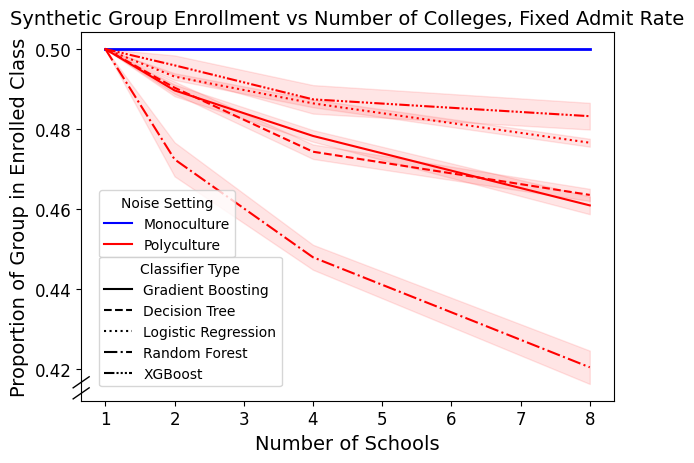

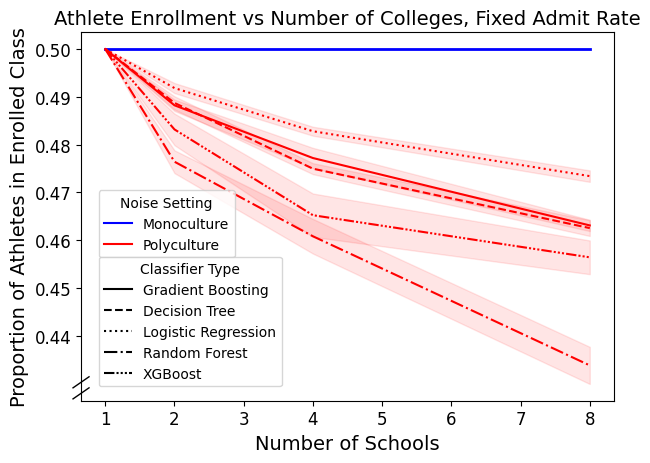

In [14]:
plot_group_proportions(synth_group_params_dict['model_types'], synth_group_params_dict['schools'], synth_prop_means, synth_group_std_err, title="Synthetic Group Enrollment vs Number of Colleges, Fixed Admit Rate", filename="ELS_synth_group.pdf")
plot_group_proportions(sport_group_params_dict['model_types'], sport_group_params_dict['schools'], sport_group_means, sport_group_std_err, y_axis="Proportion of Athletes in Enrolled Class", title="Athlete Enrollment vs Number of Colleges, Fixed Admit Rate", filename="ELS_sport_group.pdf")

# Enrollment Simulation 3 of 3: Impact of Student Preference Information on Student Enrollment

For associated discussion, see *“Winner’s Curse” Effects* in Section 5.2.2 of the Arxiv manuscript.

## Loading Data

This cell automatically loads the pre-generated enrollment simulation data. If you have generated new data from scratch, replace `run_location` with the filepath to your newly genreated data.

In [8]:
run_location = "saved_runs/legacy_effects/20251217_195746_run"

with open(f'{run_location}/params.pkl', 'rb') as f:
    legacy_qual_params_dict = pickle.load(f)

with open(f'{run_location}/stats.pkl', 'rb') as f:
    legacy_qual_stats = np.array(pickle.load(f))

legacy_qual_means = np.nanmean(legacy_qual_stats, axis = 2)

non_nan = np.count_nonzero(~np.isnan(legacy_qual_stats), axis=2)
legacy_qual_std_err = np.nanstd(legacy_qual_stats, axis=2)/np.sqrt(non_nan)

## Plots

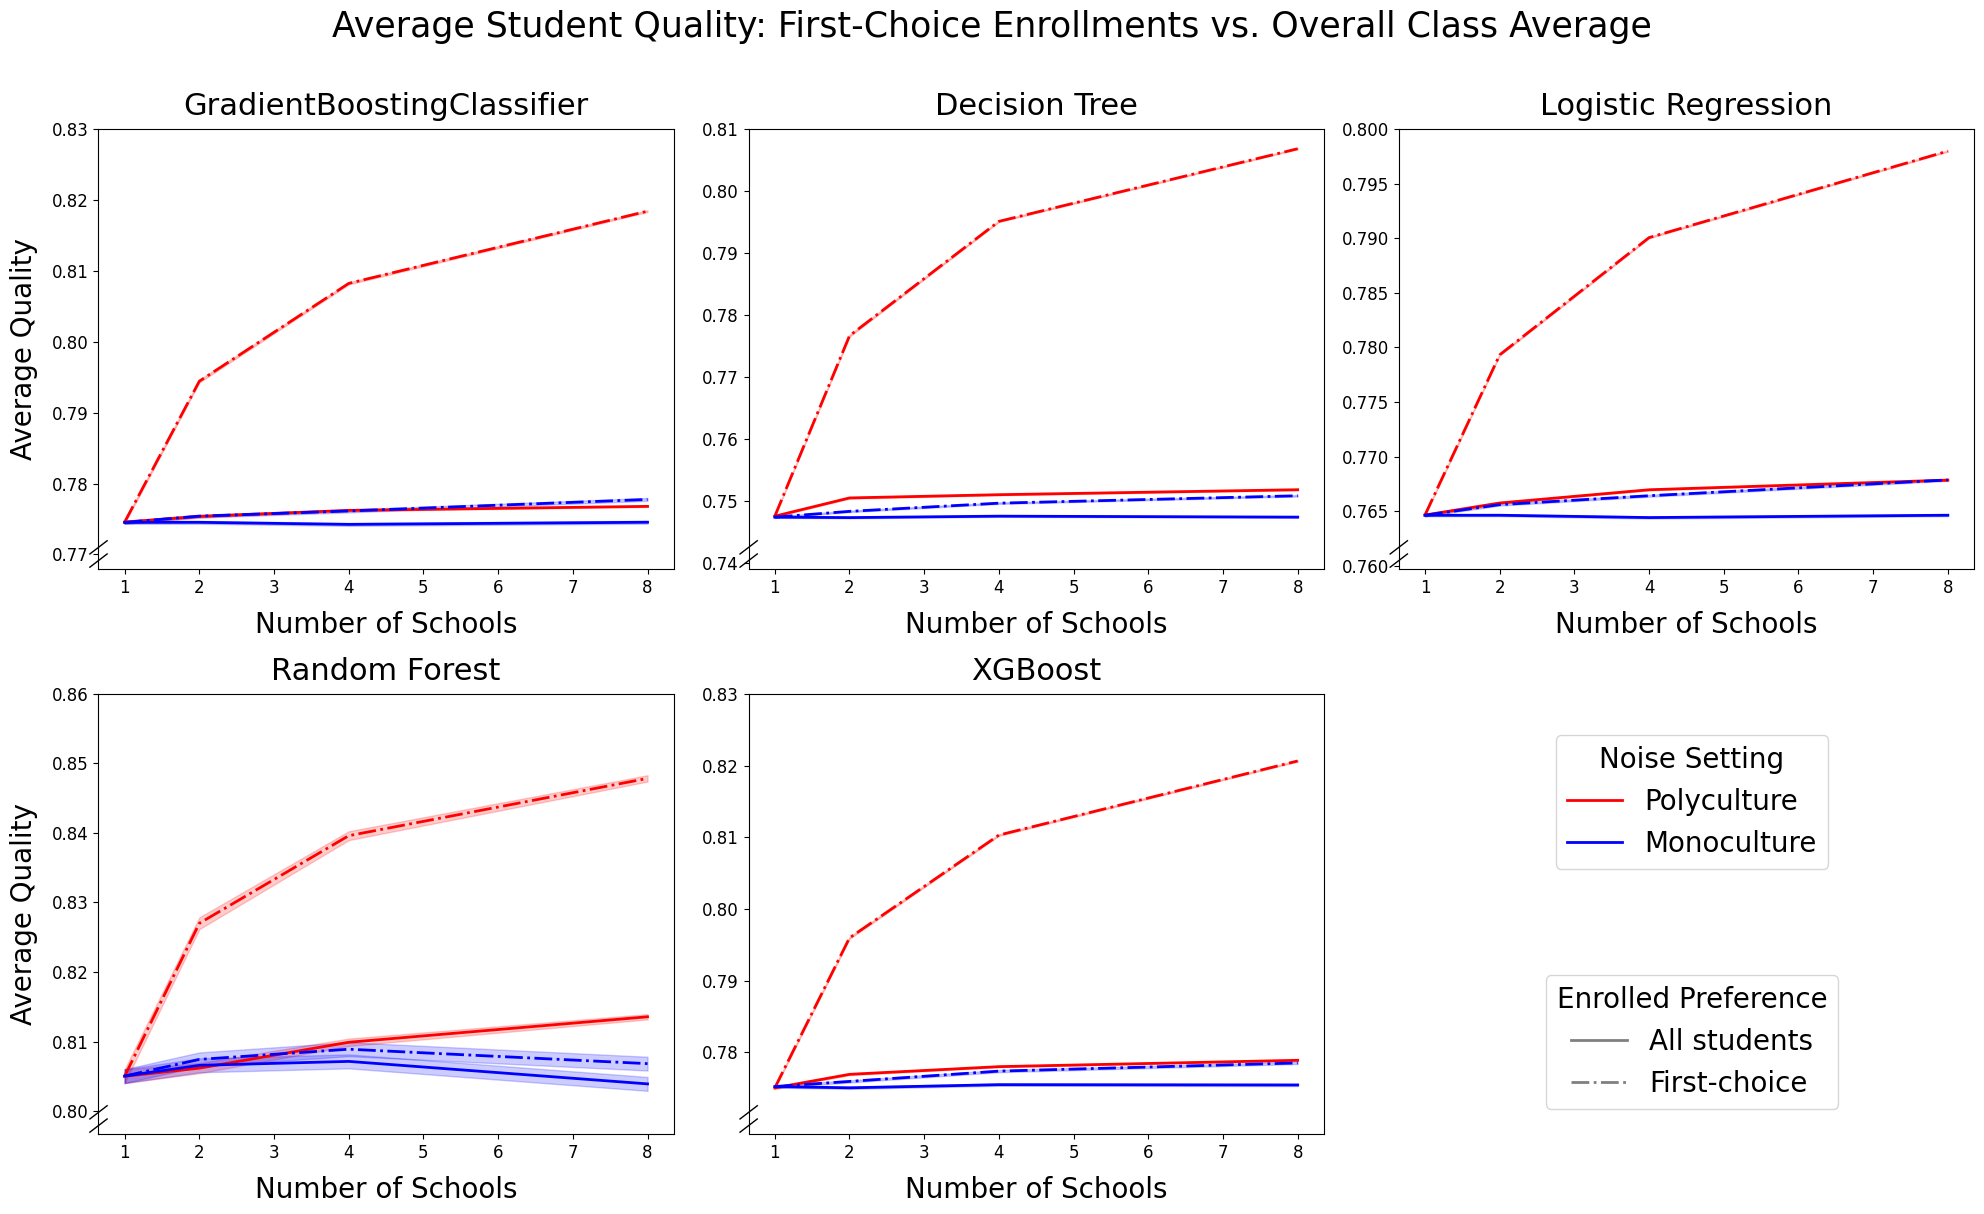

In [15]:
model_types = legacy_qual_params_dict['model_types']
schools = legacy_qual_params_dict['schools']

plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

model_titles = {
    'gb': 'GradientBoostingClassifier',
    'xgb': 'XGBoost',
    'log': 'Logistic Regression',
    'tree': 'Decision Tree',
    'rf': 'Random Forest'
}

d = 0.015 

for i, model in enumerate(model_types):
    # polyculture, mean
    axes[i].plot(schools, legacy_qual_means[i][:, 0],
                color='red', linestyle='-', label='Polyculture, all students', linewidth=2) 
    axes[i].fill_between(schools,
                        legacy_qual_means[i][:, 0] - legacy_qual_std_err[i][:, 0],
                        legacy_qual_means[i][:, 0] + legacy_qual_std_err[i][:, 0],
                        color='red', alpha=0.2)
    
    # polyculture, first choice
    axes[i].plot(schools, legacy_qual_means[i][:, 2],
                color='red', linestyle='-.', label='Polyculture, first-choice', linewidth=2) 
    axes[i].fill_between(schools,
                        legacy_qual_means[i][:, 2] - legacy_qual_std_err[i][:, 2],
                        legacy_qual_means[i][:, 2] + legacy_qual_std_err[i][:, 2],
                        color='red', alpha=0.2)
    
    # monoculture, mean
    axes[i].plot(schools, legacy_qual_means[i][:, 1],
                color='blue', linestyle='-', label='Monoculture, all students', linewidth=2)
    axes[i].fill_between(schools,
                        legacy_qual_means[i][:, 1] - legacy_qual_std_err[i][:, 1],
                        legacy_qual_means[i][:, 1] + legacy_qual_std_err[i][:, 1],
                        color='blue', alpha=0.2)
    
    # monoculture, first choice
    axes[i].plot(schools, legacy_qual_means[i][:, 3],
                color='blue', linestyle='-.', label='Monoculture, first-choice', linewidth=2)
    axes[i].fill_between(schools,
                        legacy_qual_means[i][:, 3] - legacy_qual_std_err[i][:, 3],
                        legacy_qual_means[i][:, 3] + legacy_qual_std_err[i][:, 3],
                        color='blue', alpha=0.2)
    
    axes[i].set_title(model_titles[model], fontsize=22, pad=10)
    axes[i].set_xlabel('Number of Schools', fontsize=20, labelpad=10)
    if i % 3 == 0: 
        axes[i].set_ylabel('Average Quality', fontsize=20, labelpad=10)
    
    axes[i].tick_params(axis='both', which='major', labelsize=12)

    ymin, ymax = axes[i].get_ylim()

    new_ymin = ymin - 0.08*(ymax - ymin)
    axes[i].set_ylim(new_ymin, ymax)

    ticks = axes[i].get_yticks()
    if i <= 3:
        axes[i].set_yticks(ticks[1:])
    else:
        axes[i].set_yticks(ticks[2:])

    # Add Tressman's marks (axis break marks) to the bottom of the y-axis.
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False, linewidth=1)

    # Left-side mark near (0, 0) in axes coordinates.
    axes[i].plot((-d, +d), (0.02-d, 0.02+d), **kwargs)
    # Right-side mark near (1, 0) in axes coordinates.
    axes[i].plot((-d, +d), (0.05-d, 0.05+d), **kwargs)


axes[-1].remove()

color_elements = [
    Line2D([0], [0], color='red', label='Polyculture', linewidth=2),
    Line2D([0], [0], color='blue', label='Monoculture', linewidth=2)
]

style_elements = [
    Line2D([0], [0], color='gray', linestyle='-', label='All students', linewidth=2),
    Line2D([0], [0], color='gray', linestyle='-.', label='First-choice', linewidth=2)
]

legend1 = fig.legend(handles=color_elements,
                    bbox_to_anchor=(0.85, 0.35),
                    title='Noise Setting',
                    loc='center',
                    fontsize=20,
                    title_fontsize=20)

legend2 = fig.legend(handles=style_elements,
                    bbox_to_anchor=(0.85, 0.15),
                    title='Enrolled Preference',
                    loc='center',
                    fontsize=20,
                    title_fontsize=20)

plt.suptitle('Comparison of Average Quality of Differential Students between Polyculture and Monoculture',
            y=1.02, fontsize=26)

plt.suptitle('Average Student Quality: First-Choice Enrollments vs. Overall Class Average', fontsize=25, y=1.01)


plt.tight_layout()

if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig('plots/pref_qual_ELS.pdf',
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=300)

plt.show()